<a href="https://colab.research.google.com/github/belikerevaishnavi/Courier-Management-DBMS/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, mean_squared_error as MSE, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import *
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import files
files.upload()

Saving diabetes_database.csv to diabetes_database.csv


{'diabetes_database.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4

In [ ]:
dataset = pd.read_csv('diabetes_database.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking for missing values

In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values in the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f385320ea90>,
      dtype=object)

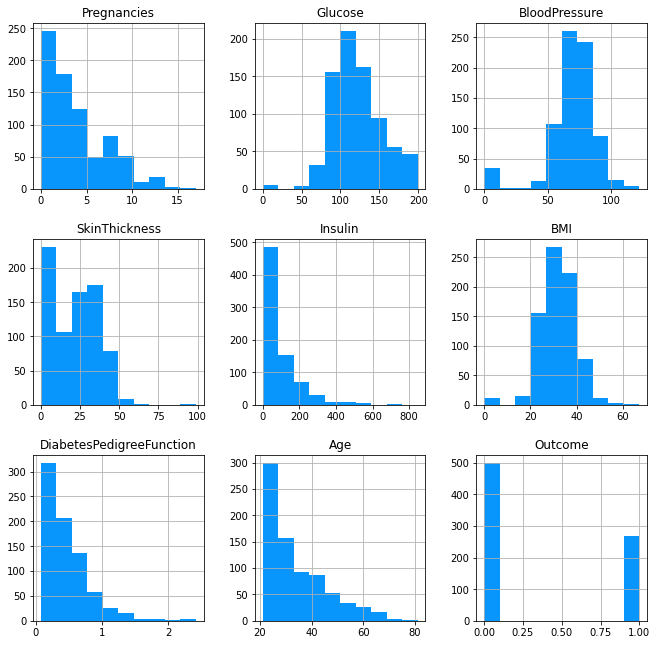

In [ ]:
dataset.hist(figsize = (11,11), color="#0896fc")

In [ ]:
dataset['Glucose'].fillna(dataset['Glucose'].mean(), inplace = True)
dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean(), inplace = True)
dataset['SkinThickness'].fillna(dataset['SkinThickness'].median(), inplace = True)
dataset['Insulin'].fillna(dataset['Insulin'].median(), inplace = True)
dataset['BMI'].fillna(dataset['BMI'].median(), inplace = True)

In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38527548d0>,
      dtype=object)

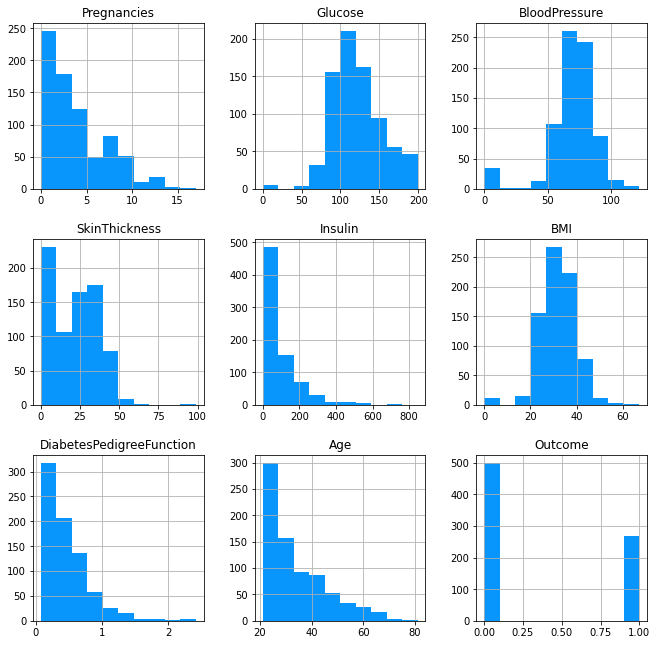

In [ ]:
dataset.hist(figsize = (11,11), color="#0896fc")

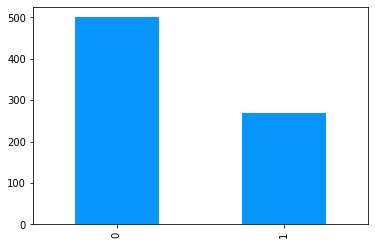

In [ ]:
dataset.Outcome.value_counts().plot(kind="bar",color="#0896fc")

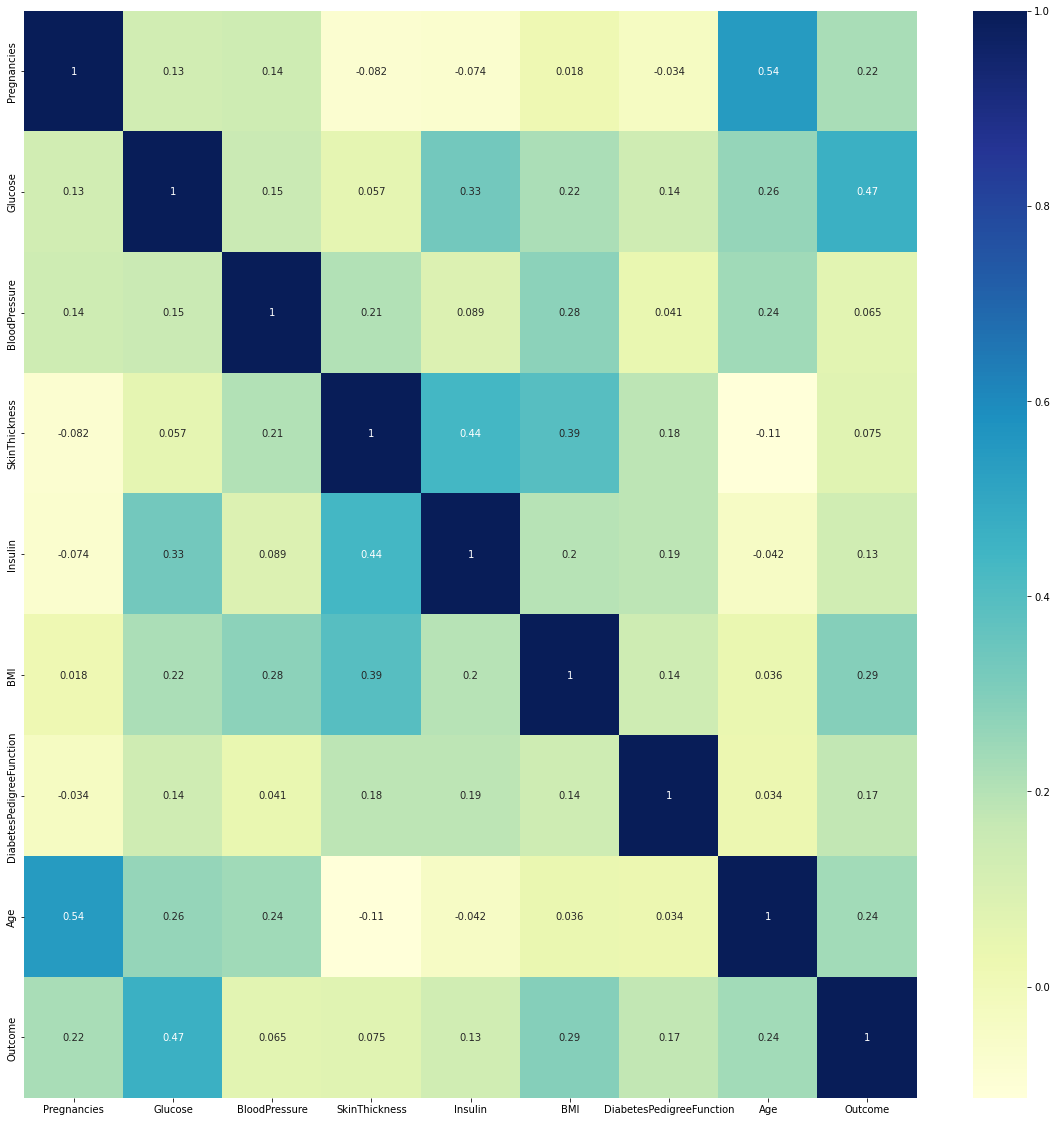

In [ ]:
plt.figure(figsize=(20,20))
p=sns.heatmap(dataset.corr(), annot=True,cmap ='YlGnBu')

Prediction Algorithms

In [ ]:
#global variables:
tot_col = len(dataset)
test = dataset.loc[0:1]
train = dataset.loc[0:1]
X_train = dataset.loc[0:1]
X_test = dataset.loc[0:1]
Y_train = dataset.loc[0:1]
Y_test = dataset.loc[0:1]
knn_acc = []
svm_acc = []
ann_acc = []
gb_acc = []
rf_acc = []

In [ ]:
def go():
  print('-'*100)
  print("test set")
  display(X_test.shape,X_test.head())
  display(Y_test.shape,Y_test.head())
  print("training set")
  display(X_train.shape,X_train.head())
  display(Y_train.shape,Y_train.head())

KNN

In [ ]:
def knn():
  global knn_acc
  X_trcp = X_train.copy()
  k = int(np.rint(np.sqrt(X_trcp.shape[0])))
  knn = KNeighborsClassifier(n_neighbors=k+5)
  knn.fit(X_trcp, Y_train)
  knn_acc.append(knn.score(X_test, Y_test))

Gradient Boost

In [ ]:
def gb():
  global gb_acc
  X_trcp = X_train.copy()
  Y_ttar = Y_test.to_numpy()
  gbr = GradientBoostingRegressor(n_estimators = 420, max_depth = 1, min_samples_split = 2,random_state = 6,learning_rate = 0.1,loss = 'squared_error')
  gbr.fit(X_trcp, Y_train)
  Y_pred = gbr.predict(X_test)
  err = MSE(Y_test, Y_pred) ** (1 / 2)
  gb_acc.append(1-err)

SVM

In [ ]:
def svm():
  global svm_acc
  X_trcp = X_train.copy()
  Y_ttar = Y_test.to_numpy()
  classifier = SVC(C = 2, kernel='linear', gamma = 'auto')
  classifier.fit(X_trcp, Y_train)
  Y_pred = classifier.predict(X_test)
  svm_acc.append(accuracy_score(Y_ttar, Y_pred))

ANN

In [ ]:
def ann():
  global ann_acc
  X_trcp = X_train.copy()
  Y_ttar = Y_test.to_numpy()
  nunet = MLPClassifier(activation = 'logistic',solver = 'adam',max_iter = 1000, hidden_layer_sizes = (500,700), random_state = 1)
  nunet.fit(X_trcp, Y_train)
  Y_pred = nunet.predict(X_test)
  ann_acc.append(accuracy_score(Y_ttar, Y_pred))

Random Forest

In [ ]:
def rf():
  global rf_acc
  X_trcp = X_train.copy()
  Y_ttar = Y_test.to_numpy()
  rfclf = RandomForestClassifier(criterion = "entropy",n_estimators=2000)
  rfclf.fit(X_trcp,Y_train)
  Y_pred = rfclf.predict(X_test)
  rf_acc.append(accuracy_score(Y_ttar, Y_pred))

K Fold Cross Verification

In [ ]:
def kfold():
    global test
    global train
    global X_train
    global X_test
    global Y_train
    global Y_test
    k = 6
    k_col = tot_col / k
    for i in range(1,k+1):
      low = int(k_col*(i-1))
      high = int((k_col*i)-1)
      test  = dataset.loc[low:high]
      test = test.reset_index()
      test.drop(['index'],axis = 1,inplace = True)
      if low == 0:
        train = dataset.loc[high+1:tot_col]
      elif high == tot_col:
        train = dataset.loc[0:low-1]
      else:
        bef = dataset.loc[0:low-1]
        aft = dataset.loc[high+1:tot_col]
        train = pd.concat([bef,aft])
      train = train.reset_index()
      train.drop(['index'],axis = 1,inplace = True)
      X_train = train.drop(['Outcome'],axis = 1)
      X_test = test.drop(['Outcome'],axis = 1)
      Y_train = train.Outcome
      Y_test = test.Outcome
      knn() #call knn
      gb()  #call gradient boost
      svm() #call svm
      ann() #call ann
      rf()  #call random forest
    print("KNN accuracy: ",np.max(knn_acc)*100,"%",knn_acc)
    print("SVM accuracy: ",np.max(svm_acc)*100,"%",svm_acc)
    print("GB accuracy: ",np.max(gb_acc)*100,"%",gb_acc)
    print("ANN accuracy: ",np.max(ann_acc)*100,"%",ann_acc)
    print("RF accuracy: ",np.max(rf_acc)*100,"%",rf_acc)

 

In [ ]:
kfold()

KNN accuracy:  85.15625 % [0.734375, 0.71875, 0.6796875, 0.734375, 0.8515625, 0.734375]
SVM accuracy:  84.375 % [0.7578125, 0.765625, 0.7265625, 0.78125, 0.84375, 0.75]
GB accuracy:  66.40850696081057 % [0.590810092183252, 0.5758745625418391, 0.5753321214758195, 0.6122223658820887, 0.6640850696081058, 0.6026531194020612]
ANN accuracy:  82.03125 % [0.7109375, 0.71875, 0.6796875, 0.796875, 0.8203125, 0.765625]
RF accuracy:  88.28125 % [0.7421875, 0.7578125, 0.734375, 0.7734375, 0.8828125, 0.7734375]


In [ ]:
def rf():
  X_trcp = X_train.copy()
  Y_ttar = Y_test.to_numpy()
  rfclf = RandomForestClassifier(criterion = "entropy",n_estimators=2000)
  rfclf.fit(X_trcp,Y_train)
  Y_pred = rfclf.predict(X_test)
  rf_fpr, rf_tpr, rf_1_thresholds = roc_curve(Y_ttar, rfclf.predict_proba(X_test)[:,1])
  rf_roc_auc = roc_auc_score(Y_ttar, rfclf.predict(X_test))
  rf_roc_auc = roc_auc_score(Y_ttar, rfclf.predict(X_test))
  plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
  plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate');
  plt.title('ROC Graph - Random Forest')
  plt.show()
  sorted_labels = [0,1]
  matrix = confusion_matrix(Y_ttar, Y_pred, labels= sorted_labels)
  sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
  plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')


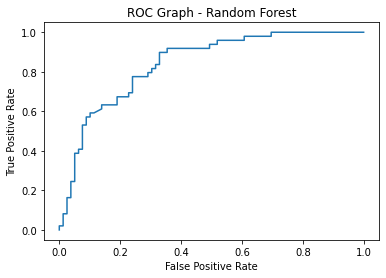

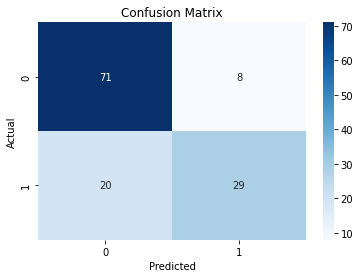

In [ ]:
rf()

Analysis

In [ ]:
idx = [i for i in range(1,len(knn_acc)+1)]
idx

[1, 2, 3, 4, 5, 6]

In [ ]:
df = pd.DataFrame(list(zip(knn_acc,svm_acc,gb_acc,ann_acc,rf_acc)),index = idx , columns = [ 'kNN' , 'SVM' , 'Gradient Boosting' , 'ANN','Random Forest' ])
df

,kNN,SVM,Gradient Boosting,ANN,Random Forest
1,0.734375,0.757812,0.590810,0.710938,0.742188
2,0.718750,0.765625,0.575875,0.718750,0.757812
3,0.679688,0.726562,0.575332,0.679688,0.734375
4,0.734375,0.781250,0.612222,0.796875,0.773438
5,0.851562,0.843750,0.664085,0.820312,0.882812
6,0.734375,0.750000,0.602653,0.765625,0.773438


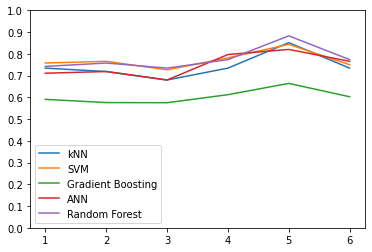

In [ ]:
df.plot()
plt.yticks(np.arange(0,1.1,0.1))
plt.show()

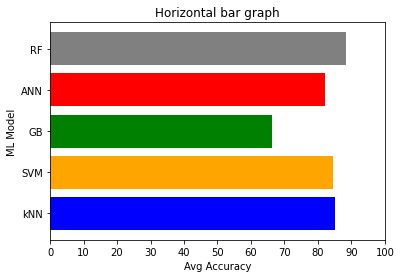

In [ ]:
x = [np.max(knn_acc)*100,np.max(svm_acc)*100,np.max(gb_acc)*100,np.max(ann_acc)*100,np.max(rf_acc)*100]
y = ['kNN','SVM','GB','ANN','RF']
plt.barh(y, x, color=['blue', 'orange', 'green', 'red', 'grey'])
plt.xticks(range(0,101,10))
plt.ylabel("ML Model")
plt.xlabel("Avg Accuracy")
plt.title("Horizontal bar graph")
plt.show()